In [1]:
import pandas as pd
df=pd.read_csv('/content/aggregated_data.csv')
df


,Patient_ID,Hour_mean,HR_mean,HR_min,HR_max,HR_std,O2Sat_mean,O2Sat_min,O2Sat_max,O2Sat_std,...,Bilirubin_total_mean,Bilirubin_total_min,Bilirubin_total_max,Bilirubin_total_std,Age_mean,Gender_first,HospAdmTime_first,ICULOS_max,SepsisLabel_max,Unit_first
0,1,26.5,92.166667,0.0,117.0,31.089038,74.537037,0.0,100.0,36.002994,...,0.005556,0.0,0.3,0.040825,83.14,0.0,-0.03,54.0,0.0,0.0
1,2,11.0,58.304348,0.0,94.0,14.995256,92.782609,0.0,100.0,20.333485,...,0.000000,0.0,0.0,0.000000,75.91,0.0,-98.60,23.0,0.0,1.0
2,3,23.5,74.635417,0.0,93.0,20.529620,87.479167,0.0,99.0,26.702052,...,0.000000,0.0,0.0,0.000000,45.82,0.0,-1195.71,48.0,0.0,1.0
3,4,14.0,95.379310,0.0,113.0,27.115051,91.431034,0.0,100.0,25.363333,...,0.000000,0.0,0.0,0.000000,65.71,0.0,-8.77,29.0,0.0,1.0
4,5,23.5,36.958333,0.0,88.0,37.724623,42.656250,0.0,99.0,48.881876,...,0.035417,0.0,0.6,0.139130,28.09,1.0,-0.05,49.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30681,110346,17.5,72.111111,0.0,92.0,22.686406,90.083333,0.0,100.0,27.598784,...,0.000000,0.0,0.0,0.000000,34.00,1.0,-0.02,36.0,0.0,0.0
30682,110347,20.5,87.702381,0.0,124.0,25.746669,90.976190,0.0,100.0,25.569120,...,0.000000,0.0,0.0,0.000000,58.00,0.0,-44.21,42.0,0.0,1.0
30683,110348,28.5,81.965517,0.0,143.0,26.028301,84.974138,0.0,100.0,31.783315,...,0.000000,0.0,0.0,0.000000,62.00,0.0,-3.53,58.0,0.0,1.0
30684,110349,21.5,48.568182,0.0,114.0,45.196418,55.045455,0.0,99.0,48.550000,...,0.000000,0.0,0.0,0.000000,72.00,1.0,-14.16,44.0,0.0,0.0


In [2]:

#need to find out total sepsis % in data set
# SepsisLabel_max column is the indicator for whether a patient has sepsis or not
total_Sepsis= df['SepsisLabel_max'].value_counts()
Sepsis_prtc = total_Sepsis/ len(df) * 100
print(Sepsis_prtc)

SepsisLabel_max
0.0    92.302679
1.0     7.694062
Name: count, dtype: float64


In [3]:

df=pd.read_csv('/content/aggregated_data.csv')
df
majority_class = df[df['SepsisLabel_max'] == 0]
minority_class = df[df['SepsisLabel_max'] == 1]
print(f'number of sepsis label 1 is {len(minority_class)}')
print(f'while number of sepsis label 0 is {len(majority_class)}')



number of sepsis label 1 is 2361
while number of sepsis label 0 is 28324


In [4]:
# Undersampling
#we will under sample majority class by twice of minority and then concat
#new data set will bi created
majority_class_subset = majority_class.sample(n=2*len(minority_class))
undersampled_df = pd.concat([majority_class_subset, minority_class])


In [5]:

majority_class = undersampled_df[undersampled_df['SepsisLabel_max'] == 0]
minority_class = undersampled_df[undersampled_df['SepsisLabel_max'] == 1]
print(f'number of sepsis label 1 is {len(minority_class)}')
print(f'while number of sepsis label 0 is {len(majority_class)}')



number of sepsis label 1 is 2361
while number of sepsis label 0 is 4722


In [6]:
total_Sepsis= undersampled_df['SepsisLabel_max'].value_counts()
Sepsis_prtc = total_Sepsis/ len(undersampled_df) * 100
print(Sepsis_prtc)

SepsisLabel_max
0.0    66.666667
1.0    33.333333
Name: count, dtype: float64


In [7]:
#now our data some what balanced

**NOW APPLYING ML TECHNIQUE**<br>
**1.LOGISTIC REGRESSION**

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
#now SepsisLable_max is depend on all others so remove it from x and only  sepsis on y. axis=1 for droping column
X = undersampled_df.drop('SepsisLabel_max', axis=1)
y = undersampled_df['SepsisLabel_max']
#split data
# Step 1: Split the data into train/validation and test sets
# - 70% of the data goes to the train/validation set (X_trainval, y_trainval)
# - 30% of the data goes to the test set (X_test, y_test)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Further split the train/validation set into training and validation sets
# - 80% of the train/validation set (56% of the original data) goes to the training set (X_train, y_train)
# - 20% of the train/validation set (14% of the original data) goes to the validation set (X_val, y_val)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
classifier = LogisticRegression(random_state=42,max_iter=1000)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Step 1: Define the hyperparameter grid to search over
# - The 'C' parameter controls the regularization strength; smaller values specify stronger regularization
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Step 2: Perform grid search using 5-fold cross-validation on the training set
# - Grid search will evaluate different 'C' values using 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 3: Output the results
# - Print the best hyperparameters found during the grid search
# - Print the best cross-validated score achieved with those hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
#traing model with best parameter
classifier_best = LogisticRegression(C=grid_search.best_params_['C'], random_state=42)
classifier_best.fit(X_train, y_train)
# Evaluate the model performance on the validation set
y_pred_val = classifier_best.predict(X_val)
LR_acc_val = accuracy_score(y_val, y_pred_val)
print('Accuracy on validation set:', LR_acc_val)
print(classification_report(y_val, y_pred_val))

# Evaluate the model performance on the testing set
y_pred_test = classifier_best.predict(X_test)
LR_acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on testing set:', LR_acc_test)
print(classification_report(y_test, y_pred_test))




Best hyperparameters: {'C': 10}
Best score: 0.7660111618983485
Accuracy on validation set: 0.7318548387096774
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.81       629
         1.0       0.75      0.40      0.52       363

    accuracy                           0.73       992
   macro avg       0.74      0.66      0.67       992
weighted avg       0.74      0.73      0.71       992

Accuracy on testing set: 0.7275294117647059
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82      1415
         1.0       0.67      0.36      0.47       710

    accuracy                           0.73      2125
   macro avg       0.71      0.64      0.64      2125
weighted avg       0.72      0.73      0.70      2125



2.SUPPORT VECTOR MACHINE (svm)

In [12]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
classifier = SVC(kernel='rbf',C=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Make predictions on the validation set
y_pred_val = classifier.predict(X_val)
# Evaluate the model performance on the validation set
SVM_acc_val = accuracy_score(y_val, y_pred_val)
# Make predictions on the testing data
y_pred_test = classifier.predict(X_test)
# Evaluate the model performance on the testing set
SVM_acc_test = accuracy_score(y_test, y_pred_test)
print('validation Accuracy:', SVM_acc_val)
print(classification_report(y_val, y_pred_val))

print('testing Accuracy:', SVM_acc_test)
print(classification_report(y_test, y_pred_test))

validation Accuracy: 0.6350806451612904
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78       629
         1.0       1.00      0.00      0.01       363

    accuracy                           0.64       992
   macro avg       0.82      0.50      0.39       992
weighted avg       0.77      0.64      0.49       992

testing Accuracy: 0.6649411764705883
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80      1415
         1.0       0.25      0.00      0.00       710

    accuracy                           0.66      2125
   macro avg       0.46      0.50      0.40      2125
weighted avg       0.53      0.66      0.53      2125



3.RANDOM FOREST

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = rfc.predict(X_val)

# Evaluate the model performance on the validation set
RF_acc_val = accuracy_score(y_val, y_pred_val)
print('Validation Accuracy:', RF_acc_val)
print(classification_report(y_val, y_pred_val))

# Make predictions on the testing set
y_pred_test = rfc.predict(X_test)

# Evaluate the model performance on the testing set
RF_acc_test = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy:', RF_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.8780241935483871
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       629
         1.0       0.92      0.73      0.81       363

    accuracy                           0.88       992
   macro avg       0.89      0.85      0.86       992
weighted avg       0.88      0.88      0.87       992

Testing Accuracy: 0.8691764705882353
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      1415
         1.0       0.92      0.67      0.77       710

    accuracy                           0.87      2125
   macro avg       0.89      0.82      0.84      2125
weighted avg       0.87      0.87      0.86      2125



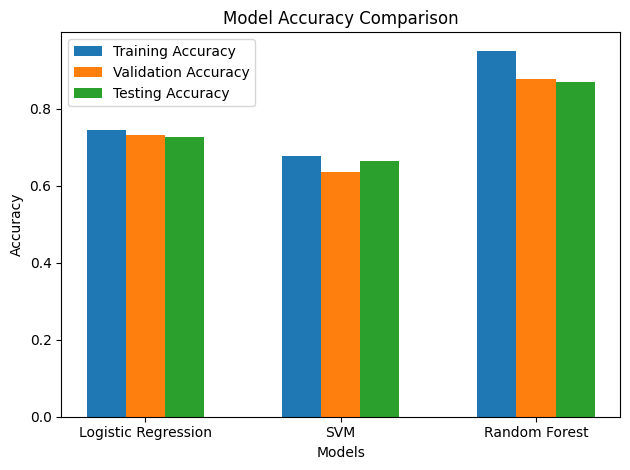

In [15]:
import numpy as np
import matplotlib.pyplot as plt

train_accuracies = [accuracy_score(y_train, classifier_best.predict(X_train)),
                    accuracy_score(y_train, classifier.predict(X_train)),
                    accuracy_score(y_train, rfc.predict(X_train))]

val_accuracies = [LR_acc_val, SVM_acc_val, RF_acc_val]
test_accuracies = [LR_acc_test, SVM_acc_test, RF_acc_test]

models = ['Logistic Regression', 'SVM', 'Random Forest']
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x, val_accuracies, width, label='Validation Accuracy')
rects3 = ax.bar(x + width, test_accuracies, width, label='Testing Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()
